## CSMODEL Project 1- Statistical Inference

by: **Jericho Dizon** and **Patrick Narvasa**

This notebook serves as a analysis of the [U.S. Education Datasets: Unification Project](https://www.kaggle.com/noriuk/us-education-datasets-unification-project) found in Kaggle. This serves as our submission for the requirements of our class CSMODEL SY 2020-2021 Term 3. 

The U.S Education Dataset: Unification Project is an effort by Roy Garrard to reflect the "multiple facets" of the US education system in one csv file. He aggregated the data collected from various source, mainly from the  U.S. Census Bureau and the National Center for Education Statistics (NCES). It contains data of the number of students enrolled in a year, in each grade level, separated in each states. The data spans from 1992 to the last update of 2019. 

The **NAEP** stands for the National Assessment of Educational Progress (NAEP), [which is an assessment of the educational system in the US](https://nces.ed.gov/nationsreportcard/about/). It is an exam taken by students in Grade 4, 8, and 12 [every two years](https://nces.ed.gov/nationsreportcard/about/ltt_main_diff.asp). The scale of scores in Grades 4 and 8 is from 0-500 while the scale of scores in Grade 12 is 0-300. There are lots of subjects like Science and Geography and it is mostly added in the Grade 12 exams, but what they all have in common and most important data to check are the **Reading and Math scores**. This is the source of the academic grades columns from Roy 


## Collection Process
The collection of data were gathered by the use of different online sources that have databases on the number of enrollment, financials and academic achievement. The website gathered the data using surveys and reports from different government websites like U.S. Census Bureau and the National Center for Education Statistics with the following links:
- Enrollment
https://nces.ed.gov/ccd/stnfis.asp
- Financials
https://www.census.gov/programs-surveys/school-finances/data/tables.html
- Academic Achievement
https://www.nationsreportcard.gov/ndecore/xplore/NDE

## Structure of the Data File

In the Kaggle Library, there two (2) csv files: states_all.csv and states_all_extended.csv. The states_all.csv is an aggregated version of the data found in states_all_extended. We will be using only **states_all.csv** since it encompassses all the data we need for analysis.

There are 1715 observations inside the states_all file. Each observation is a state in the U.S. together with what year the columns are from.

Example: 1992_ALABAMA is different from 2000_ALABAMA

The example given is from the column PRIMARY_KEY. This gives easier access to which state and year we would want to observe, although there are 2 columns that contain those variables (STATE, YEAR).

The columns represent the data that concerns the schools of that given state in that given period of time. It is mainly concerned data such as number of student per grade level, the state revenue generated by the schools, and academic performance (NAEP)


## Variables

In the `states_all.csv` file in Excel,the following are the descriptions of each variable in the dataset.

- **`STATE`**: name of state in the USA
- **`YEAR`**: year in which the grade of the state is taken
- **`AVG_MATH_4_SCORE`**: average score of grade 4 students in math
- **`AVG_MATH_8_SCORE`**: average score of grade 8 students in math
- **`AVG_READING_4_SCORE`**: average score of grade 4 students in reading
- **`AVG_READING_8_SCORE`**: average score of grade 8 students in reading

## Research Questions

In this analysis, we want to find out the following. This derived from the EDAs that can be found from below:
1) Is there a significant difference between the NAEP scores of all states in 2019 compared to the scores of all states in 2005?
2) Is there any significance between the reading and math NAEP scores per state in 2019.

## Imports

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

## Reading the CSV

In [28]:
states_df = pd.read_csv('states_all.csv')
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [29]:
states_df.tail(53)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1662,2019_ALABAMA,ALABAMA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,230.0,269.0,212.0,253.0
1663,2019_ALASKA,ALASKA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,232.0,274.0,204.0,252.0
1664,2019_ARIZONA,ARIZONA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,238.0,280.0,216.0,259.0
1665,2019_ARKANSAS,ARKANSAS,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,233.0,274.0,215.0,259.0
1666,2019_CALIFORNIA,CALIFORNIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,235.0,276.0,216.0,259.0
1667,2019_COLORADO,COLORADO,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,285.0,225.0,267.0
1668,2019_CONNECTICUT,CONNECTICUT,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,243.0,286.0,224.0,270.0
1669,2019_DELAWARE,DELAWARE,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,239.0,277.0,218.0,260.0
1670,2019_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,235.0,269.0,214.0,250.0
1671,2019_DODEA,DODEA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,250.0,292.0,235.0,280.0


## Data Cleaning

We will be dropping some variables that are not needed since we are interested only in the average exam scores for math and reading of grade 4 students through out the different states and years.

In [30]:
states_df=states_df.drop(['PRIMARY_KEY', 'ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','AVG_MATH_8_SCORE','AVG_READING_8_SCORE'], axis = 1)

After dropping the variables that arent needed next is that we will remove the observations that have no scores since it will affect the result of the data analysis if we keep them.

In [31]:
states_df = states_df.dropna(subset=['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE'])
states_df.head(105)

,STATE,YEAR,AVG_MATH_4_SCORE,AVG_READING_4_SCORE
0,ALABAMA,1992,208.0,207.0
2,ARIZONA,1992,215.0,209.0
3,ARKANSAS,1992,210.0,211.0
4,CALIFORNIA,1992,208.0,202.0
5,COLORADO,1992,221.0,217.0
...,...,...,...,...
670,DELAWARE,2005,240.0,226.0
671,DISTRICT_OF_COLUMBIA,2005,211.0,191.0
672,FLORIDA,2005,239.0,219.0
673,GEORGIA,2005,234.0,214.0


We will only use the observations starting from 2011 to 2019 because not only does the previous years have a lot of missing data we also would like to utilize the recent years since it will be more up to date.

In [32]:
states_df= states_df[states_df['YEAR'] > 2010]  
states_df.tail(10)

,STATE,YEAR,AVG_MATH_4_SCORE,AVG_READING_4_SCORE
1705,SOUTH_DAKOTA,2019,241.0,222.0
1706,TENNESSEE,2019,240.0,219.0
1707,TEXAS,2019,244.0,216.0
1708,UTAH,2019,244.0,225.0
1709,VERMONT,2019,239.0,222.0
1710,VIRGINIA,2019,247.0,224.0
1711,WASHINGTON,2019,240.0,220.0
1712,WEST_VIRGINIA,2019,231.0,213.0
1713,WISCONSIN,2019,242.0,220.0
1714,WYOMING,2019,246.0,227.0


## Exploratory Data Analysis

This section explores the data and tries to represent it visually to have a clearer understanding of trends and relations between the variables. 

## First EDA: How does the average NAEP scores compare each year? (Grade 4 Reading and Math) 
For the first EDA, we would like to see the increase or decrease of grades through years 2011-2019. We will get the average score of grade 4 math and reading result, to do that we will first get the data that we need and create a new data set that only contains the average score of all the states and to do that first we will need to remove the NATIONAL observations because it was said to be the average of the all the states but we want to compute for the average to make sure

In [33]:
states1_df = states_df[states_df["STATE"] != "NATIONAL"]

After removing the NATIONAL observations we will now get the mean, std, and count of each of the year then make a csv file for the dataset

In [34]:
states11_df = states1_df[states1_df["YEAR"] == 2011]
states13_df = states1_df[states1_df["YEAR"] == 2013]
states15_df = states1_df[states1_df["YEAR"] == 2015]
states17_df = states1_df[states1_df["YEAR"] == 2017]
states19_df = states1_df[states1_df["YEAR"] == 2019]
print("----------Math----------")
print(states11_df.agg({"AVG_MATH_4_SCORE": ["mean", "std", "count"]}))
print(states13_df.agg({"AVG_MATH_4_SCORE": ["mean", "std", "count"]}))
print(states15_df.agg({"AVG_MATH_4_SCORE": ["mean", "std", "count"]}))
print(states17_df.agg({"AVG_MATH_4_SCORE": ["mean", "std", "count"]}))
print(states19_df.agg({"AVG_MATH_4_SCORE": ["mean", "std", "count"]}))
print("----------Reading----------")
print(states11_df.agg({"AVG_READING_4_SCORE": ["mean", "std", "count"]}))
print(states13_df.agg({"AVG_READING_4_SCORE": ["mean", "std", "count"]}))
print(states15_df.agg({"AVG_READING_4_SCORE": ["mean", "std", "count"]}))
print(states17_df.agg({"AVG_READING_4_SCORE": ["mean", "std", "count"]}))
print(states19_df.agg({"AVG_READING_4_SCORE": ["mean", "std", "count"]}))



----------Math----------
       AVG_MATH_4_SCORE
mean         240.480769
std            5.778562
count         52.000000
       AVG_MATH_4_SCORE
mean         241.961538
std            5.455566
count         52.000000
       AVG_MATH_4_SCORE
mean         240.423077
std            5.022874
count         52.000000
       AVG_MATH_4_SCORE
mean         239.423077
std            5.424513
count         52.000000
       AVG_MATH_4_SCORE
mean         239.923077
std            4.706467
count         52.000000
----------Reading----------
       AVG_READING_4_SCORE
mean            220.346154
std               6.796437
count            52.000000
       AVG_READING_4_SCORE
mean            221.307692
std               6.673149
count            52.000000
       AVG_READING_4_SCORE
mean            222.326923
std               5.953154
count            52.000000
       AVG_READING_4_SCORE
mean            221.326923
std               6.044674
count            52.000000
       AVG_READING_4_SCORE
mean    

The csv file is now created we will now use the data to display a line plot to see the changes though out the years if the grade increase as time goes on or did it decrease

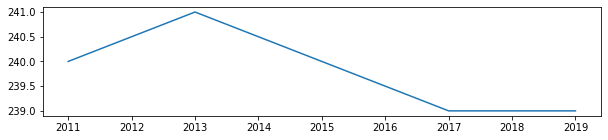

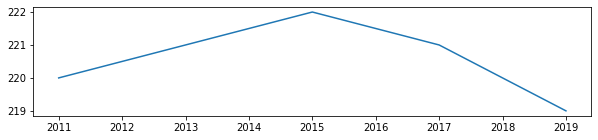

In [35]:
yearmean_df = pd.read_csv('year_means.csv')
years = yearmean_df['YEARS']
math = yearmean_df['AVG_MATH_4_SCORE']
read = yearmean_df['AVG_READING_4_SCORE']
fig, ax = plt.subplots(figsize=(10,2))
ax.plot(years, math)
fig, bx = plt.subplots(figsize=(10,2))
bx.plot(years, read)

From the line plot we can see that compared to older years the latest scores or the scores for 2019 are lower compared to previous years but there was an increase in the two years after 2011 but starting from 2017 the decline happened. Comparing the two graphs we can see that we have two different years in which a subject reached it peak, for math it was the year 2013 and for reading it was 2015 but the lowest is only 2019.

## Second EDA: How does the scores of the Reading exam compare to the Math exam per state on the latest data (2019)
For the second EDA, we would like to see the statistics involved during the 2019 NAEP exam. We have two sets of numbers to work with, grade 4 reading results and grade 4 math results. The first thing to do is to drop one row which is the NATIONAL row. The original dataset author included this to show the mean for the scores in the USA during 2019, since we would like to figure this out on our own, and at the same time visualize it, we're dropping it for now.

In [36]:
second_eda_df=states_df[states_df['YEAR'] == 2019]
second_eda_df= second_eda_df.drop([1690,1671],axis=0).head(52) #deletes the national column
second_eda_df.head(52)

,STATE,YEAR,AVG_MATH_4_SCORE,AVG_READING_4_SCORE
1662,ALABAMA,2019,230.0,212.0
1663,ALASKA,2019,232.0,204.0
1664,ARIZONA,2019,238.0,216.0
1665,ARKANSAS,2019,233.0,215.0
1666,CALIFORNIA,2019,235.0,216.0
1667,COLORADO,2019,242.0,225.0
1668,CONNECTICUT,2019,243.0,224.0
1669,DELAWARE,2019,239.0,218.0
1670,DISTRICT_OF_COLUMBIA,2019,235.0,214.0
1672,FLORIDA,2019,246.0,225.0


After the NATIONAL row is drop, it's time to check for the central tendencies: the mean, median and mode. Together we also find the standard deviation too.

In [37]:
second_eda_df.agg({"AVG_MATH_4_SCORE": ["mean", "median", "std", "count"]})

,AVG_MATH_4_SCORE
mean,239.725490
median,240.000000
std,4.530247
count,51.000000


In [38]:
second_eda_df.agg({"AVG_READING_4_SCORE": ["mean", "median","std", "count"]})

,AVG_READING_4_SCORE
mean,219.490196
median,220.000000
std,4.834760
count,51.000000


In [39]:
mode= second_eda_df.mode(axis=0, numeric_only=True, dropna=True)
mode.head(1)

,YEAR,AVG_MATH_4_SCORE,AVG_READING_4_SCORE
0,2019.0,239.0,218.0


After executing the following code, we got the following data. The average (mean) score for Math is 239.92 and the average score for Reading is 219.78. It also looks like the most prevalent scores from all of the states is 239.0 for Math and 218.0 for reading. After knowing the statistics, we would like to see if this would visually represent through a graphic. We chose to use a boxplot to show the median, the upper and lower whiskers, and the interquartile range.

<AxesSubplot:>

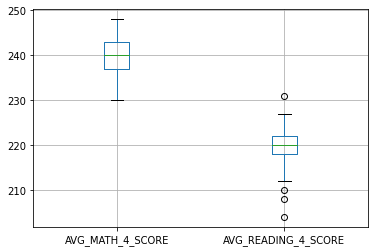

In [40]:
second_eda_boxplot = pd.DataFrame(data = second_eda_df, columns = ['AVG_MATH_4_SCORE','AVG_READING_4_SCORE'])
second_eda_boxplot.boxplot()

With this boxplot, it obviously shows the drastic significant distance between the Math and Reading scores. It has a normal distribution. However, there are outliers in the average reading scores compared to the math scores that looks somewhat consistent. All in all it's safe to say that with this EDA, it shows that the US states in 2019 had better scores in math than in reading.

## Third EDA: What are the Top 10 best performing states for 5 NAEP tests? (2019,2017,2015,2013,2011)

bar graph of average scores of each state across 5 years

In [41]:
temp_df = states_df[states_df["STATE"] != "NATIONAL"]
temp_df2=temp_df[temp_df["STATE"]!="DODEA"]

In [42]:
samp_eda_df=temp_df2[temp_df2['YEAR'] == 2019]
# third_eda_df= third_eda_df.drop([1690],axis=0).head(52) #deletes the national column
# third_eda_df.head(52)
states_bank= samp_eda_df.loc[:,'STATE']
states_bank = states_bank.values
states_bank

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

In [43]:
row_temp = states_df[(states_df['STATE']=='ALABAMA') & (states_df['YEAR']==2011)]
suma=row_temp['AVG_MATH_4_SCORE']
suma= int(suma)
suma

231

In [44]:
dict = {'State':[],
        'Average Math':[],
        'Average Reading':[]
       }
third_eda_df = pd.DataFrame(dict)

for x in states_bank:
    year=2011
    sum_math=0
    sum_reading=0
    while year<2020:
        row_temp = states_df[(states_df['STATE']==x) & (states_df['YEAR']==year)]
        a=row_temp['AVG_MATH_4_SCORE']
        b=row_temp['AVG_READING_4_SCORE']
        sum_math += float(a)
        sum_reading += float(b)
        year+=2
        
    average_math= sum_math/5
    average_reading= sum_reading/5
    third_eda_df.loc[len(third_eda_df.index)] = [x, average_math,average_reading]

third_eda_df
    

,State,Average Math,Average Reading
0,ALABAMA,231.4,216.8
1,ALASKA,234.0,208.2
2,ARIZONA,237.0,214.2
3,ARKANSAS,236.0,217.0
4,CALIFORNIA,233.4,213.6
5,COLORADO,243.2,224.8
6,CONNECTICUT,241.4,227.6
7,DELAWARE,239.4,222.8
8,DISTRICT_OF_COLUMBIA,229.6,209.2
9,FLORIDA,243.4,226.4


In [45]:
third_eda_df.agg({"Average Math": ["mean", "median", "std", "count"]})


,Average Math
mean,240.321569
median,241.000000
std,4.919362
count,51.000000


From the statistics above, we can see that the average of math scores for 5 years is 240.44, while the median is 241.

In [46]:
third_eda_df.agg({"Average Reading": ["mean", "median", "std", "count"]})

,Average Reading
mean,220.788235
median,222.200000
std,5.674280
count,51.000000


From the statistics above, we can see that the average of reading scores for 5 years is 221.03, while the median is 222.

In [47]:
eda_math=third_eda_df.sort_values(by=['Average Math'],ascending=False).head(10)
eda_math

,State,Average Math,Average Reading
21,MASSACHUSETTS,250.6,234.2
23,MINNESOTA,249.8,223.8
29,NEW_HAMPSHIRE,248.8,229.4
30,NEW_JERSEY,246.8,229.8
14,INDIANA,246.6,224.2
46,VIRGINIA,246.6,227.2
50,WYOMING,246.4,226.4
34,NORTH_DAKOTA,244.6,223.6
38,PENNSYLVANIA,243.8,225.6
45,VERMONT,243.6,226.6


Above is the top 10 states that performed well in Math

In [48]:
eda_reading=third_eda_df.sort_values(by=['Average Reading'],ascending=False).head(10)
eda_reading

,State,Average Math,Average Reading
21,MASSACHUSETTS,250.6,234.2
30,NEW_JERSEY,246.8,229.8
29,NEW_HAMPSHIRE,248.8,229.4
6,CONNECTICUT,241.4,227.6
46,VIRGINIA,246.6,227.2
45,VERMONT,243.6,226.6
50,WYOMING,246.4,226.4
9,FLORIDA,243.4,226.4
20,MARYLAND,242.2,226.2
38,PENNSYLVANIA,243.8,225.6


Above is the top 10 states that performed well in Reading

TOP 10 PERFORMING STATES IN MATH FROM 2011-2019

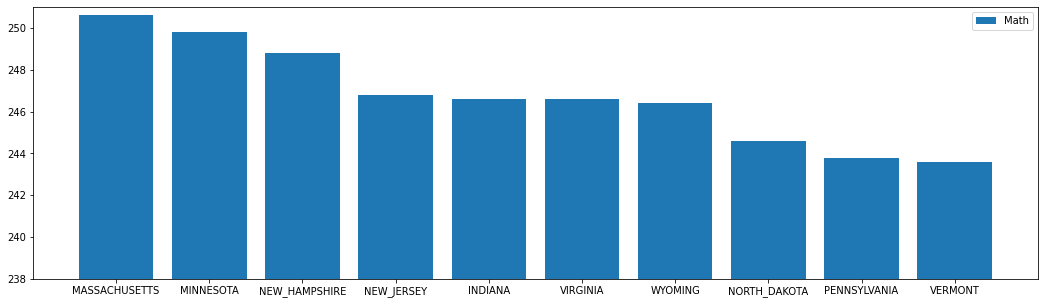

In [49]:
f, ax = plt.subplots(figsize=(18,5))
plt.bar(eda_math['State'], eda_math['Average Math'], label = 'Math')
plt.ylim(238,251)
ax.legend(fontsize = 10)

TOP 10 PERFORMING STATES IN READING FROM 2011-2019

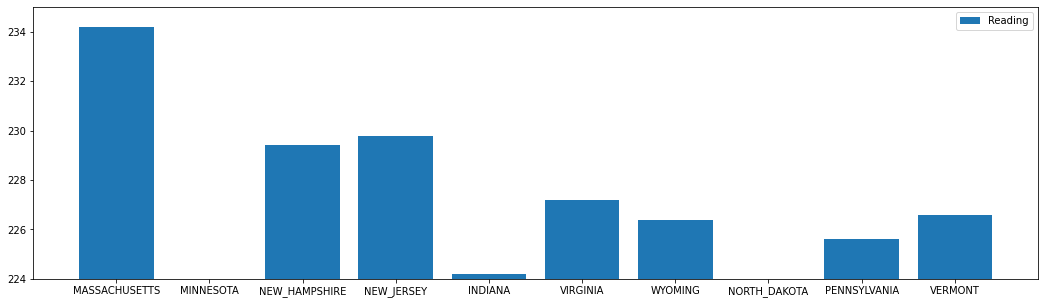

In [50]:
f, ax = plt.subplots(figsize=(18,5))
plt.bar(eda_math['State'], eda_math['Average Reading'], label = 'Reading')
plt.ylim(224,235)
ax.legend(fontsize = 10)

## Is there a significant difference between the NAEP scores of all states in 2019 compared to the scores of all states in 2005?

## Is there any significance between the grade 4 and 8 math NAEP scores per state in 2019

For this research question, we want to know if there is a significant difference between the grades 4 and 8 scores. The average score for grade for is 240 rounded up, and for grade 8, the average score is 284. To properly compare these two, we decided to use binning and place categorical data. The categories are below average, average, and above average. The deciding factor being the values 239-241 and 283-285 for grade 4 and 8 respectively. (-1,+1 for average)

In [51]:
binned_grades = pd.read_csv('binned_grades_4_8.csv')
binned_grades

,STATE,AVE_GRADE,GRADE_LVL
0,ALABAMA,below average,1
1,ALASKA,below average,1
2,ARIZONA,below average,1
3,ARKANSAS,below average,1
4,CALIFORNIA,below average,1
...,...,...,...
97,VIRGINIA,above average,0
98,WASHINGTON,above average,0
99,WEST_VIRGINIA,below average,0
100,WISCONSIN,above average,0


Now that we have properly binned the data, it's best to start grouping the three categories and seeing how many per grade level.

In [57]:
grades_counts = binned_grades.groupby("GRADE_LVL")["AVE_GRADE"].value_counts()
grades_counts

GRADE_LVL  AVE_GRADE    
0          below average    32
           above average    12
           average           7
1          below average    21
           above average    16
           average          14
Name: AVE_GRADE, dtype: int64

In [53]:
count_df = pd.DataFrame([grades_counts[0], grades_counts[1]], index=["Grade 8","Grade 4"]).transpose()
count_df

,Grade 8,Grade 4
AVE_GRADE,,
below average,32,21
above average,12,16
average,7,14


As seen above, it looks like a lot of states underperformed below average with their Grade 8 scores. At first glance it is looking like the spread and consistency is better with Grade 4 students

Being this, we have two assumptions/hypotheses:

$H_0$ (null hypothesis): There is no significant difference between the Grade 8 and Grade 4 scores.

$H_A$ (alternative hypothesis): There is significant difference between the Grade 8 and Grade 4 scores.
    

In [58]:
chi2_contingency(count_df)

(5.187780772686433,
 0.07472875012853829,
 2,
 array([[26.5, 26.5],
        [14. , 14. ],
        [10.5, 10.5]]))

With the use of the Chi Squared Test, we have our P-Level at 0.07. At a significant level of 0.05, our conclusion:

Reject the $H_0$ (null hypothesis): There is significant difference between the Grade 8 and Grade 4 scores.

With our following data analysis we can therefore conclude that there is significant difference between Grade 8 and Grade 4. It looks like it is true that Grade 4 scores are better than the older students. 